# Fraud Detection Using Text - The Enron Scandal

![enron](enron.jpg)

## Welcome

## Dataset description

## Important libraries

In [1]:
# pandas & numpy:
import numpy as np
import pandas as pd

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# tokenization:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string

# gensim:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import pyLDAvis.gensim_models
from gensim.parsing.preprocessing import STOPWORDS

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#keras:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #We use this because some text are shorter than others. All text should have the same number of words

C:\Users\Merche\anaconda3\envs\Da_Env1\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


## Loading & understanding our data

In [2]:
df=pd.read_csv('Data/enron_emails_clean.csv')
# With "pd.set_option('display.max_columns', None)" we see all the columns of the dataset.
pd.set_option('display.max_columns', None)
df

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
...,...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2001-10-22 14:00:17,"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2002-01-25 17:39:38,I'm okay. How are you ?,okay
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),2002-02-01 16:15:17,\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),2002-01-29 02:01:00,\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...


In [3]:
def clean_data(df):
    
    df=df.drop(columns=['Date'])
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    
    return df

In [4]:
df=clean_data(df)
df

,message-id,from,to,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),I'm okay. How are you ?,okay
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   message-id     2090 non-null   object
 1   from           2090 non-null   object
 2   to             2090 non-null   object
 3   content        2090 non-null   object
 4   clean_content  2086 non-null   object
dtypes: object(5)
memory usage: 81.8+ KB


In [6]:
df.isnull().sum()

message-id       0
from             0
to               0
content          0
clean_content    4
dtype: int64

In [7]:
df=df.dropna().reset_index(drop=True)
df

,message-id,from,to,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
...,...,...,...,...,...
2081,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks
2082,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),I'm okay. How are you ?,okay
2083,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...
2084,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...


## Fraud flags

In [8]:
# Now that we have all the text data together, we can flag some terms as "fraud suspect"
# WE know that Enron employees activaley participated in the fraud by keeping the stock price manually high. 
# We can create a list of fraudulent terms that helps us to find the emails with reference to the word "stock".

fraud_list=['stock','enron stock','sell stock','bonus','wall street','board','the market','dow jones']

# Now we filter the column completed text using the list "fraud_list".


filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(fraud_list), na=False)]
print(filtered_emails)


                                         message-id  \
0      <8345058.1075840404046.JavaMail.evans@thyme>   
1      <1512159.1075863666797.JavaMail.evans@thyme>   
2     <26118676.1075862176383.JavaMail.evans@thyme>   
3     <10369289.1075860831062.JavaMail.evans@thyme>   
4     <26728895.1075860815046.JavaMail.evans@thyme>   
...                                             ...   
1953   <4261005.1075859896123.JavaMail.evans@thyme>   
1969    <869435.1075860254534.JavaMail.evans@thyme>   
1974  <30265339.1075860276037.JavaMail.evans@thyme>   
2073  <18859674.1075845408035.JavaMail.evans@thyme>   
2077  <12084261.1075861172096.JavaMail.evans@thyme>   

                                 from                               to  \
0     ('advdfeedback@investools.com')  ('advdfeedback@investools.com')   
1       ('richard.sanders@enron.com')    ('richard.sanders@enron.com')   
2               ('m..love@enron.com')            ('m..love@enron.com')   
3        ('leslie.milosevich@kp.org')     (

In [9]:
# "Filtered_emails" represents the emails with fraudulent terminology. 
# We will create a new column named fraud in the dataframe. 
# The new column will have 2 values: 0: non-fraud ; 1: fraud

df['fraud'] = np.where((df['clean_content'].str.contains('|'.join(fraud_list)) == True), 1, 0)
        
df      

,message-id,from,to,content,clean_content,fraud
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...,1
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...,1
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...,1
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...,1
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...,1
...,...,...,...,...,...,...
2081,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks,0
2082,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),I'm okay. How are you ?,okay,0
2083,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...,0
2084,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...,0


In [10]:
count = df['fraud'].value_counts()
print(count)

0    1655
1     431
Name: fraud, dtype: int64


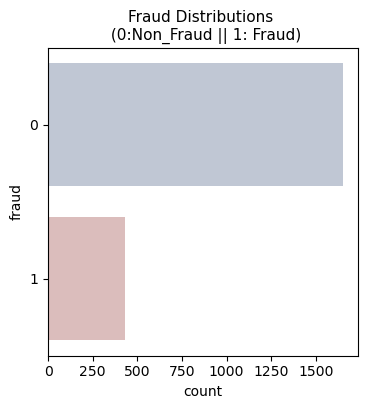

In [11]:
#Plot the count plot for fraudulent and no fraudulent emails
plt.figure(figsize = (4, 4))
sns.countplot(y = "fraud", data = df,palette='vlag')
plt.title('Fraud Distributions \n (0:Non_Fraud || 1: Fraud)', fontsize=11)
plt.show()

## Detecting fraud using text mining

In order to clean our text data we need to follow these steps:
    <ol>
  <li>Tokenization</li>
  <li>Remove all Stopwords</li>
  <li>Lemanize your words</li>
  <li>Stem your words</li>
</ol>

In [12]:
#now he are going to get the stopwords for English
#now he are going to get the stopwords for English
stop = set(stopwords.words('english')) 
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
#get additional stop words from nltk
stop.update(['from','to','cc','http', 're', 'www', 'com'])

In [14]:
# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

In [15]:
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

In [16]:
text_clean=[]

for text in df['clean_content']:
    text_clean.append(clean(text,stop).split())  

In [17]:
# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(corpus)
print(dictionary)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (7, 2), (8, 4), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 5), (15, 3), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 3), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 1), (57, 4), (58, 9), (59, 5), (60, 1), (61, 8), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 12), (82, 2), (83, 2), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 1), (98, 2), (99, 2), (100, 1), (101, 2), (102, 5), (103, 1), (104, 3), (105, 8), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

In [18]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=2)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.019*"enron" + 0.006*"e" + 0.005*"company" + 0.004*"new" + 0.004*"market"')
(1, '0.013*"enron" + 0.011*"td" + 0.007*"subject" + 0.006*"align" + 0.006*"message"')
(2, '0.019*"enron" + 0.018*"image" + 0.014*"td" + 0.014*"net" + 0.012*"money"')


In [19]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus,dictionary, sort_topics=False)

pyLDAvis.display(lda_display)


C:\Users\Merche\anaconda3\envs\Da_Env1\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
